Importing the necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE


In [4]:
import pandas as pd
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from preprocess_data import preprocess
from models.logistic_reg import train_logistic_regression
from models.xgboost import train_xgboost
from models.cat_boost import train_catboost
from load_data import load_german_data


Loading the dataset

In [5]:
df=load_german_data()

c:\Users\Manu\OneDrive\Desktop\MANASVI\Credit_score_project\load_data.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


Exploratory Data Analysis

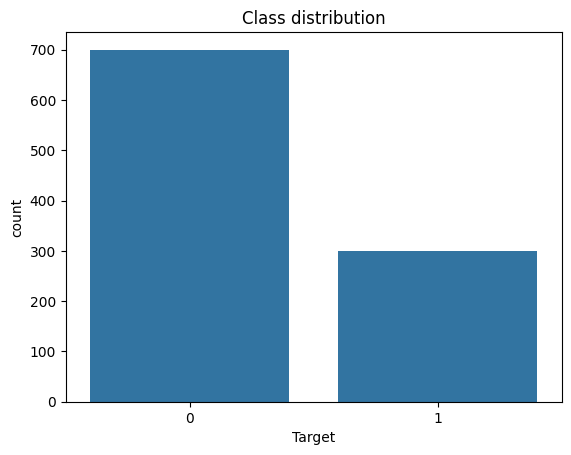

,Duration,CreditAmount,InstallmentRate,ResidenceSince,Age,ExistingCredits,NumDependents,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Target')
plt.title("Class distribution")
plt.show()

df.describe()

Preprocessing

In [13]:
from preprocess_data import preprocess
X_train, X_test, y_train, y_test = preprocess(df, is_train=True)
import joblib

# After encoding and preprocessing training data
joblib.dump(list(X_train.columns), "expected_columns.pkl")


['expected_columns.pkl']

In [14]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


C:\Users\Manu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class distribution after SMOTE:
Target
1    559
0    559
Name: count, dtype: int64


Logistic regression

In [20]:
log_model = train_logistic_regression(X_train_resampled, y_train_resampled)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       141
           1       0.54      0.80      0.64        59

    accuracy                           0.74       200
   macro avg       0.72      0.76      0.72       200
weighted avg       0.79      0.74      0.75       200



XGBoost

In [21]:
xgb_model = train_xgboost(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


C:\Users\Manu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning: [19:25:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.67      0.63      0.65        59

    accuracy                           0.80       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.80      0.80      0.80       200



CatBoost

In [22]:
cat_model = train_catboost(X_train_resampled, y_train_resampled)
y_pred_cat = cat_model.predict(X_test)

print("CatBoost Results:")
print(classification_report(y_test, y_pred_cat))


CatBoost Results:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       141
           1       0.66      0.59      0.62        59

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.78      0.79      0.79       200



Saving the models

In [18]:
import joblib

joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(cat_model, 'catboost_model.pkl')


['catboost_model.pkl']